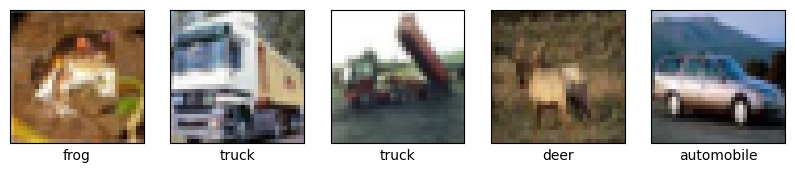




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)            

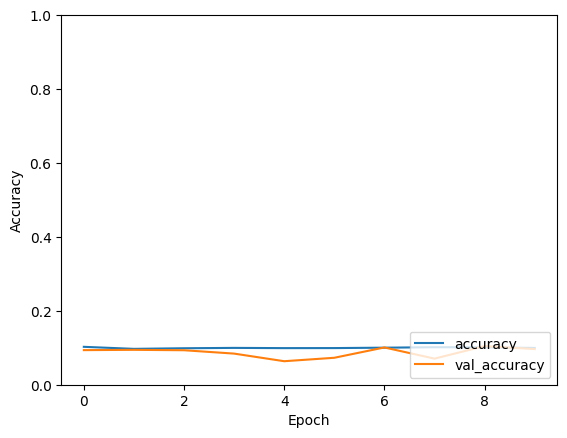

1/1 [==============================] - 0s 92ms/step


c:\Users\hsingh\OneDrive - INVIDI Technologies Corp\machine learning\machine-learning\myenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Predicted class: cat


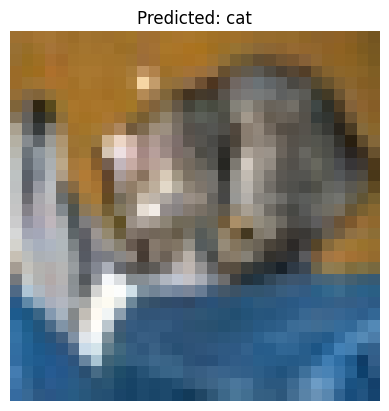

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize the first 5 images from the training dataset
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Create an instance of ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation between 0 and 20 degrees
    width_shift_range=0.2,  # Random horizontal shift by 20%
    height_shift_range=0.2, # Random vertical shift by 20%
    horizontal_flip=True,   # Randomly flip images horizontally
    zoom_range=0.2          # Randomly zoom into images
)

# Fit the datagen to the training images
datagen.fit(train_images)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model using the augmented data
epochs = 10
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Save the model
model.save("cifar10_image_classification_model.h5")

# Load the model (for future use)
# loaded_model = tf.keras.models.load_model("cifar10_image_classification_model.h5")

# Inference on a single image
def predict_single_image(model, image):
    # Ensure the image is of shape (32, 32, 3)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    predictions = model.predict(image)
    predicted_label = np.argmax(predictions)
    return class_names[predicted_label]

# Example usage for inference
single_image = test_images[0]  # Select a single image from the test set
predicted_class = predict_single_image(model, single_image)
print(f'Predicted class: {predicted_class}')

# Visualize the single image with the predicted label
plt.imshow(single_image)
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()